In [99]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import GaussianSmoother

import spikeinterface.full as si
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
from spikeinterface.preprocessing import bandpass_filter

In [100]:
#extract raw data
local_path = '/home/mxwbio/Desktop/MEA_Analysis/ASmouse/16874/Network/000225/data.raw.h5'
recording = se.read_maxwell(local_path)
# w_ts = sw.plot_timeseries(recording, time_range=(0, 300), channel_ids= recording.channel_ids[420:421])
# plt.axis([0, 300, 420, 580])

In [101]:
#data info
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()

#print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)
print('Number of segments:', num_seg)

Sampling frequency: 20000.0
Number of channels: 869
Number of segments: 1


BandpassFilterRecording: 869 channels - 1 segments - 20.0kHz - 300.080s


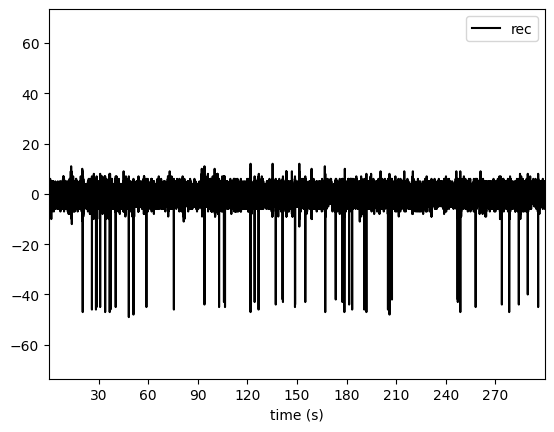

In [103]:
#apply bandpass filter
recording_bp = bandpass_filter(recording, freq_min=200, freq_max=4000)
print(recording_bp)
bpf_ts = sw.plot_timeseries(recording_bp, time_range=(0, 300), channel_ids= recording.channel_ids[420:421])

In [139]:
# scope
# parameters
smoothing_window_size = 0.3
burst_detection_threshold = 50
minimum_peak_distance = 1.0
start_stop_threshold = 0.3
#visualization
start_time = 0
end_time = 0
use_fixed_y_max = False
nework_activity_y_max = 4
# sorter output file dir
sorting_dir = ''

custom_KS3_params = {'detect_threshold': 50,
 'projection_threshold': [9, 9],
 'preclust_threshold': 8,
 'car': True,
 'minFR': 0.2,
 'minfr_goodchannels': 0.2,
 'nblocks': 5,
 'sig': 20,
 'freq_min': 300,
 'sigmaMask': 30,
 'nPCs': 3,
 'ntbuff': 64,
 'nfilt_factor': 4,
 'do_correction': True,
 'NT': None,
 'wave_length': 50,
 'keep_good_only': False,
 'n_jobs': 1,
 'total_memory': None,
 'chunk_size': None,
 'chunk_memory': None,
 'chunk_duration': '1s',
 'progress_bar': True}

In [141]:
#sorter info 
# how to change default params:
# https://spikeinterface.readthedocs.io/en/latest/modules/sorters/plot_1_sorters_example.html#sphx-glr-modules-sorters-plot-1-sorters-example-py

default_KS3_params = ss.get_default_sorter_params('kilosort3')
#default_KS3_params

In [142]:
#run sorter
#run_sorter = ss.run_kilosort3(recording_bp, output_folder="kilosort3", docker_image="spikeinterface/kilosort3-compiled-base", **default_KS3_params)
#run_sorter = ss.run_kilosort3(recording_bp, output_folder="kilosort3_test", docker_image="spikeinterface/kilosort3-compiled-base", **custom_KS3_params)
run_sorter = ss.run_kilosort3(recording_bp, output_folder="kilosort3_test", docker_image="spikeinterface/kilosort3-compiled-base", **default_KS3_params)
sorting_KS3 = ss.Kilosort3Sorter._get_result_from_folder('/home/mxwbio/Desktop/MEA_Analysis/kilosort3/')
sorting_KS3_test = ss.Kilosort3Sorter._get_result_from_folder('/home/mxwbio/Desktop/MEA_Analysis/kilosort3_test/')

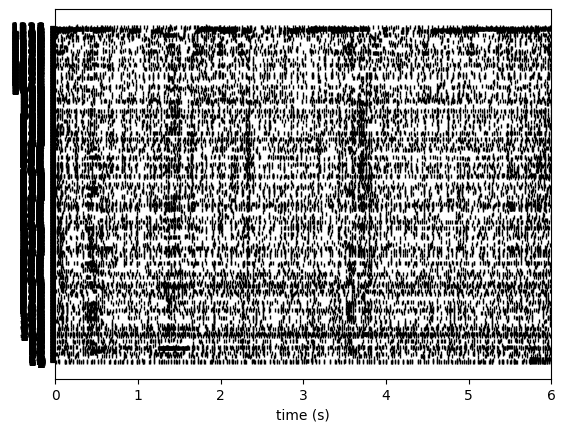

In [126]:
w_rs = sw.plot_rasters(sorting_KS3, time_range=(0, 6))

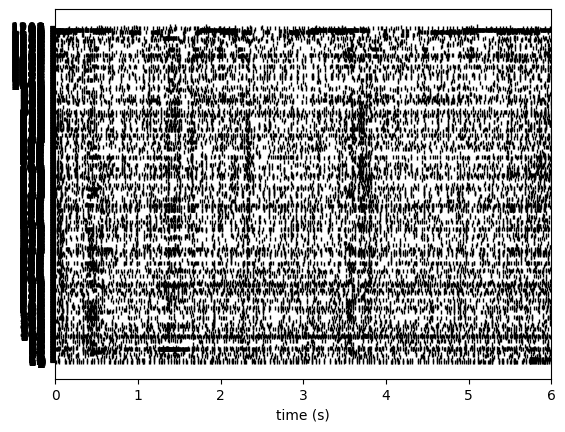

In [ ]:
w_rs_test = sw.plot_rasters(sorting_KS3_test, time_range=(0, 6))

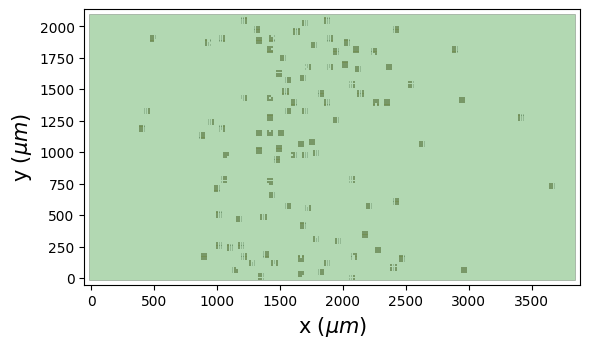

In [81]:
w_pm = sw.plot_probe_map(recording)

Text(0.5, 0, 'time(s)')

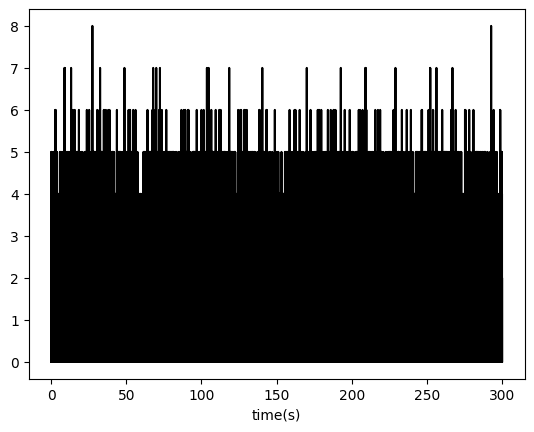

In [98]:
#sum rasters
s_ids = sorting_KS3.get_unit_ids()

network = np.zeros(recording.get_num_frames())
for i in s_ids:
    for j in sorting_KS3.get_unit_spike_train(i):
        network[j] = network[j]+1

t = np.arange(0, recording.get_num_frames()/recording.get_sampling_frequency(), 1/recording.get_sampling_frequency())
plt.plot(t,network, color='black')
plt.xlabel('time(s)')
#plt.plot(t, network, 'o', color='blue')